In [1]:
from simulation import *
from aesthetics import *
from models import *
from data import *

import glob
import os as os
import re as re
import pandas as pd

%reload_ext autoreload
%autoreload 2
%matplotlib inline
mpl.rc('text', usetex=True)

In [57]:
hexo_concentration = [0, 2.481389578163771, 12.406947890818856, 52.10918114143925, 99.25558312655096, 503.72208436724566, 999.9999999999999]
hexo_diffusion     = [72.72603760767626, 
                      78.25807395107039, 
                      83.56112426761267, 
                      89.26001754899093, 
                      95.64247233203444, 
                      99.47466246497277, 
                      100.44466878638349]
hexo_reaction_rate = [
 -1.321116238844752
, 21.582208172729224
, 91.50892051681586
, 143.3783894608921
, 254.69808915297955
, 281.80333857704153
]

# k_cat = 408 per second
# delta g = -16.7 kJ/mol http://onlinelibrary.wiley.com/doi/10.1016/0307-4412(81)90102-3/pdf
hexo_delta_g = -16.7

0.095014889, 74.751010600


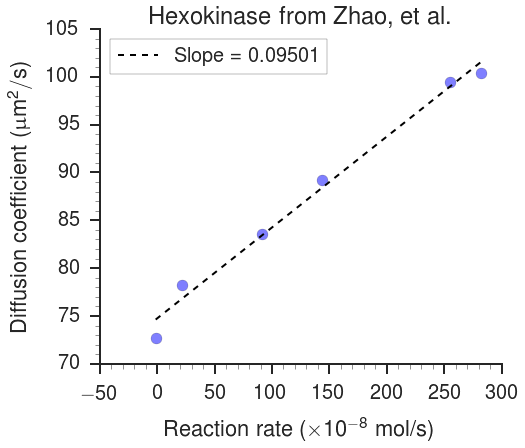

In [52]:
fig = plt.figure(figsize=(6*1.2,6), dpi=300)
from matplotlib.gridspec import GridSpec
gs = GridSpec(1, 1, wspace=0.3)
ax1 = fig.add_subplot(gs[0,0])

ax1.scatter(hexo_reaction_rate, [i for i in hexo_diffusion if i != 95.64247233203444], s=120, c='b', alpha=0.5)
ax1.set_xlabel(r'Reaction rate ($\times 10^{{-8}} \text{{ mol/s}}$)')
ax1.set_ylabel(r'Diffusion coefficient ($\mu\text{{m}}^2/\text{{s}}$)')
ax1.set_title('Hexokinase from Zhao, et al.')

def line(x, m, b):
    return m * x + b

popt, pcov = sc.optimize.curve_fit(line, hexo_reaction_rate, [i for i in hexo_diffusion if i != 95.64247233203444], p0=[20, 0])
hexo_slope = popt[0]
intercept = popt[1]
print('{0:11.9f}, {1:11.9f}'.format(hexo_slope, intercept))
ax1.plot(hexo_reaction_rate, [line(i, hexo_slope, intercept) for i in hexo_reaction_rate], c='k', lw=2, ls='--', label='Slope = ${0:0.5f}$'.format(hexo_slope))
# ax1.legend()
ax1.legend(markerscale=0, loc=2, frameon=True)
aesthetics.paper_plot(fig)


In [54]:
ald_concentration = [
-0.8866247398357245,
0.9392211227073517, 
9.835523596991493, 
45.57852264274288, 
96.25889442403212, 
498.6212233918657, 
997.2424467837316, 
]
ald_diffusion = [
42.68807339449541
, 44.61467889908256
, 47.45871559633027
, 50.85321100917431
, 53.65137614678899
, 55.440366972477065
, 55.89908256880734
]
ald_reaction_rate = [
 -0.025200201601613514
, 0.40785126281010164
, 2.3226185809486477
, 4.283586268690149
, 4.831886655093241
, 5.319594556756455
, 5.3765470123761006
]

# k_cat = 5 per second
# delta g = 23.8 kJ/mol http://onlinelibrary.wiley.com/doi/10.1016/0307-4412(81)90102-3/pdf
ald_delta_g = 23.8

2.250570591, 42.847095337


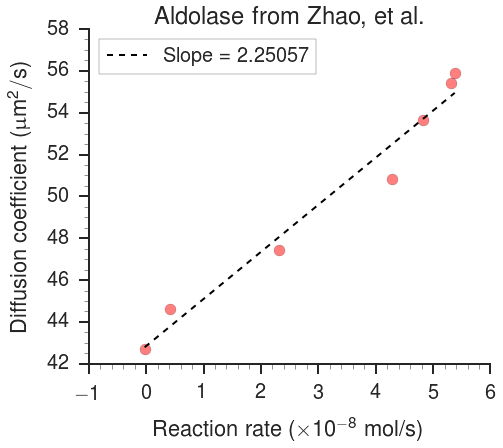

In [47]:
fig = plt.figure(figsize=(6*1.2,6), dpi=300)
from matplotlib.gridspec import GridSpec
gs = GridSpec(1, 1, wspace=0.3)
ax1 = fig.add_subplot(gs[0,0])

ax1.scatter(ald_reaction_rate, ald_diffusion, s=120, c='r', alpha=0.5)
ax1.set_xlabel(r'Reaction rate ($\times 10^{{-8}} \text{{ mol/s}}$)')
ax1.set_ylabel(r'Diffusion coefficient ($\mu\text{{m}}^2/\text{{s}}$)')
ax1.set_title('Aldolase from Zhao, et al.')

def line(x, m, b):
    return m * x + b

popt, pcov = sc.optimize.curve_fit(line, ald_reaction_rate, ald_diffusion, p0=[20, 0])
ald_slope = popt[0]
intercept = popt[1]
print('{0:11.9f}, {1:11.9f}'.format(ald_slope, intercept))
ax1.plot(ald_reaction_rate, [line(i, aldslope, intercept) for i in ald_reaction_rate], c='k', lw=2, ls='--', label='Slope = ${0:0.5f}$'.format(slope))
ax1.legend(markerscale=0, loc=2, frameon=True)
aesthetics.paper_plot(fig)


/home/dslochower/anaconda3/lib/python3.5/site-packages/scipy/optimize/minpack.py:690: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


0.053223598, 0.983848969


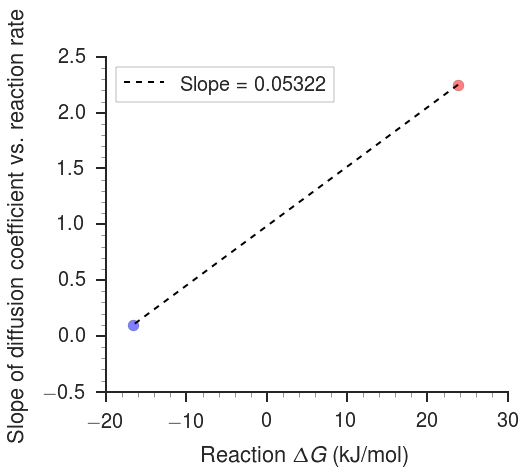

In [61]:
fig = plt.figure(figsize=(6*1.2,6), dpi=300)
from matplotlib.gridspec import GridSpec
gs = GridSpec(1, 1, wspace=0.3)
ax1 = fig.add_subplot(gs[0,0])

ax1.scatter(ald_delta_g, ald_slope, c='r', s=120, alpha=0.5)
ax1.scatter(hexo_delta_g, hexo_slope, c='b', s=120, alpha=0.5)

ax1.set_xlabel(r'Reaction $\Delta G$ (kJ/mol)')
ax1.set_ylabel(r'Slope of diffusion coefficient vs. reaction rate')
# ax1.set_title('Aldolase from Zhao, et al.')



def line(x, m, b):
    return m * x + b

popt, pcov = sc.optimize.curve_fit(line, [ald_delta_g, hexo_delta_g], [ald_slope, hexo_slope], p0=[20, 0])
slope = popt[0]
intercept = popt[1]
print('{0:11.9f}, {1:11.9f}'.format(slope, intercept))
ax1.plot([ald_delta_g, hexo_delta_g], [line(i, slope, intercept) for i in [ald_delta_g, hexo_delta_g]], c='k', lw=2, ls='--', label='Slope = ${0:0.5f}$'.format(slope))
ax1.legend(markerscale=0, loc=2, frameon=True)


aesthetics.paper_plot(fig)